# **ES203 Eletromagnetismo 1 (2022.2)**
## **Método dos Momentos - Capacitor de Placas Paralelas**

**Equipe:**
*   Pedro Henrique Almeida Girao Peixinho
*   Victor Gabriel de Carvalho

**Professor:**
*   Odilon Maroja da Costa Pereira Filho

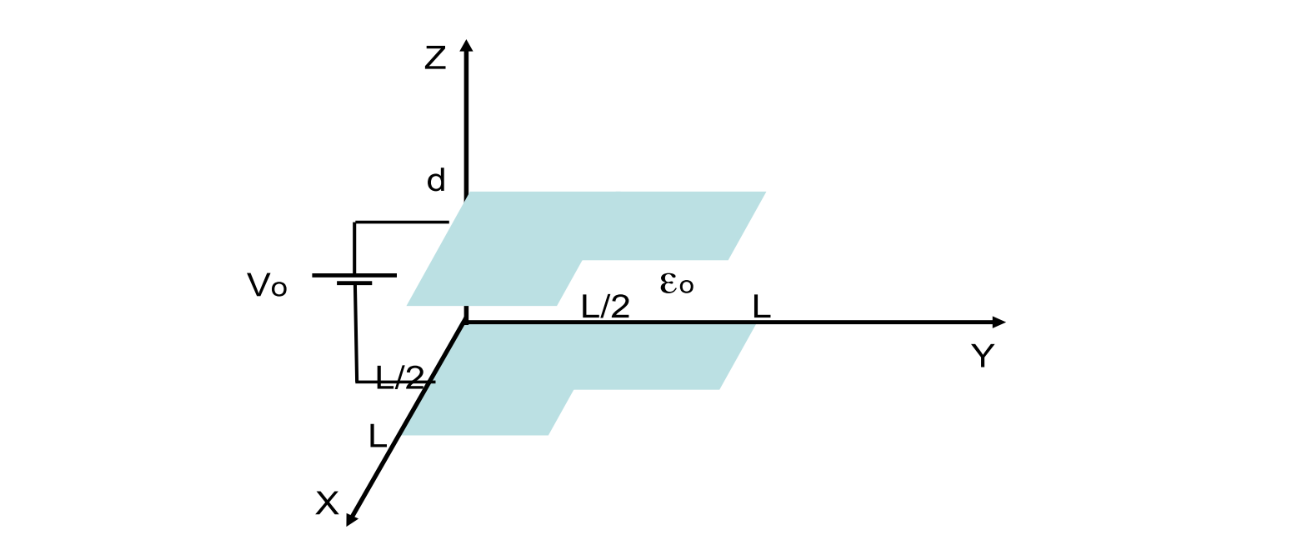

### 1. Determine as expressões para os elementos das matrizes de impedância e de tensão do método dos momentos, em função de N.

O método dos momentos é uma técnica usada para determinar o potencial em todo o espaço, quando apenas o conhecemos em alguma região. Usaremos esse método para descobrir a distribuição superficial de carga $ ρ_s $ ao longo das placas. O valor do potencial V($\vec r$) em um ponto $\vec r$ qualquer pode ser descrito como:

$$ V(\vec r)=\frac{1}{4\piε_0}\iint_{S'}\frac{ρ_s(\vec r')}{|\vec r - \vec r'|}ds' $$


Trabalhar diretamente com a fórmula seria muito custoso matematicamente. Logo, para simplificar os calculos, precisamos discretizar nossas placas em quadrados menores de lado Δ, onde ($ N $ é par):

$$ Δ = \frac{L}{N} $$

Nesse contexto, a distribuição superficial de carga será aproximada por uma soma de funções pulso em cada quadrado determinado:

$$ ρ_s(x,y,z) \approx \sum_{n=1}^{2N^2}a_nP_n(x,y,z) $$

Onde $ a_n $ são os coeficientes que precisaremos encontrar e $ P_n(x,y,z) $ são as funções de base.

Nosso problema está submetido às seguntes condições de contorno, que serão impostas no centro de cada quadrado: 


\begin{align}
\text{V}(\vec r) = \left\{
\begin{array}{cl}
V_0 & \vec r & pertence & a & placa & de & cima \\
0 & \vec r & pertence & a & placa & de & baixo.
\end{array}
\right.
\end{align}


Cada centro poderá ser referenciado por $ r_n(x_i,y_j,z_k) $ e $ r_m(x_p,y_p,z_p) $, onde: 

$ n = i + (j-1)N + kN^2 $

$ m = p + (q-1)N + sN^2 $

Impondo o potencial $V_0$ no ponto $\vec r_m = (x_p, y_q, z_s)$ e utilizando a aproximação da função da densidade de carga:

$$ V(z_s) = \frac{1}{4\piε_0}\iint_{S'}\frac{\sum_{n=1}^{2N²}a_nP_n(x,y,z)}{|\vec r_m - \vec r'|}ds' $$

Daí,

$$ V(z_s) = \frac{1}{4\piε_0}\sum_{n=1}^{2N²}a_n\iint_{S'}\frac{P_n(x,y,z)}{|\vec r_m - \vec r'|}ds' $$

Aplicando os limites, temos

$$ V(z_s) = \frac{1}{4\piε_0}\sum_{n=1}^{2N²}a_n\int_{x_i-\frac{\Delta}{2}}^{x_i+\frac{\Delta}{2}}\int_{y_j-\frac{\Delta}{2}}^{y_j+\frac{\Delta}{2}}\frac{P_n(x,y,z)}{|\vec r_m - \vec r'|}dy'dx' $$

Colocando em forma matricial, obtemos:

$$ 
\begin{bmatrix}
  \\ Z \\ \\
\end{bmatrix}
\begin{bmatrix}
  a_1      \\
  \vdots   \\
  a_{2N^2} \\
\end{bmatrix} =
\begin{bmatrix}
  \\ V \\ \\
\end{bmatrix}
$$

Diante de tudo, podemos obter as expressões para os elementos das matrizes de impedância e de tensão. $ Z_mn $ é igual ao potencial no ponto gerado por uma
densidade superficial de carga constante e igual a 1 no sub-domínio $ n $.

Para $m\ne n$:
$$Z_{mn} = \frac{1}{4 \pi \epsilon_0} \int_{x_i - \Delta/2}^{x_i + \Delta/2} \int_{y_j - \Delta/2}^{y_j + \Delta/2} \frac{1}{\sqrt{(x_p-x')^2 + (y_q-y')^2 + (z_s-z_k)^2}} \ dx'dy'$$

<center>Ou</center>

$$Z_{mn} = \frac{1}{4 \pi \epsilon_0} \frac{\Delta^2}{\sqrt{(x_p-x')^2 + (y_q-y')^2 + (z_s-z_k)^2}} $$

Para $m=n$:
$$ Z_{mn} = \frac{\Delta}{\piε_0}ln(1+\sqrt2) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm

Cálculo do centro de cada elemento, da voltagem de cada seção e se o ponto está dentro da placa ou não:

In [2]:
def set_initial_values(N, V0, delta):
    """Calculates the center of each section, the voltage of each section and if it is a plate or not"""
    center = []
    voltageM = []
    isPlate = []

    for k in range(2):
        for i in range(1, N+1):
            for j in range(1, N+1):
                if (i > (N+1)/2) and (j > (N+1)/2): # Ponto fora da placa
                    center.append([(j - 0.5)*delta, (i - 0.5)*delta, k*d])
                    voltageM.append(0)
                    isPlate.append(False)
                else: # Ponto dentro da placa
                    center.append([(j - 0.5)*delta, (i - 0.5)*delta, k*d])
                    isPlate.append(True)
                    if k == 1:
                        voltageM.append(V0)
                    else:
                        voltageM.append(0)

    return center, voltageM, isPlate

Cálculo da matriz de impedância:

In [3]:
def impedance_matrix(N, centers, delta, isPlate):
    """Calculates the impedance matrix of the system"""
    e0 = 8.85e-12
    impedanceM = []

    for i in range(2*(N**2)):
        impedanceM.append([])
        for j in range(2*(N**2)):
            if i == j:
                impedanceM[i].append((delta/(math.pi * e0))
                                    * (math.log(1 + math.sqrt(2))))
            elif not isPlate[i] or not isPlate[j]:
                impedanceM[i].append(0)
            else:
                impedanceM[i].append(1/(4 * math.pi * e0) * pow(delta, 2) 
                                    / math.sqrt(pow(centers[i][0] - centers[j][0], 2) + pow(centers[i][1] - centers[j][1], 2) + pow(centers[i][2] - centers[j][2], 2)))

    return impedanceM

Cálculo dos pulsos de cada seção e definição dos pontos que serão plotados:

In [4]:
def get_pulses(impedanceM, voltageM):
    """Calculates the pulses of each section"""
    return np.linalg.solve(impedanceM, voltageM)

In [5]:
def set_blank(isPlate, a, r):
    """Sets the blank spaces in the plot"""
    for i, b in enumerate(isPlate):
        if not b:
            a[i] = math.nan
            r[i] = [math.nan, math.nan, math.nan]
    return np.array(a), np.array(r)

Plotar os resultados:

In [6]:
def plot_results(N, r, a, V, isPlate):
    """Plots the results"""
    a, r = set_blank(isPlate, a, r)

    fig = plt.figure(figsize=(10, 10))

    # Ambas placas na mesma projeção
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot_surface(np.reshape(r[:len(r)//2, 0], (N, N)), np.reshape(r[:len(r)//2, 1], (N, N)), 
                     np.reshape(np.array(a[:len(a)//2]), (N, N)), cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax1.plot_surface(np.reshape(r[:len(r)//2, 0], (N, N)), np.reshape(r[:len(r)//2, 1], (N, N)), 
                     np.reshape(np.array(a[len(a)//2:len(a)]), (N, N)), cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax1.set_title('Projeção 3D Capacitor')

    # Projeção em duas dimensões os coeficientes
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(a)
    ax2.set_xlabel('N divisões')
    ax2.set_ylabel('Pulsos')

    # Projeção individual da placa inferior
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax3.plot_surface(np.reshape(r[:len(r)//2, 0], (N, N)), np.reshape(r[:len(r)//2, 1], (N, N)),
                     np.reshape(np.array(a[:len(a)//2]), (N, N)), cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax3.set_title('Projeção 3D (Parte inferior)')

    # Projeção individual da placa superior
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.plot_surface(np.reshape(r[:len(r)//2, 0], (N, N)), np.reshape(r[:len(r)//2, 1], (N, N)), 
                     np.reshape(np.array(a[len(a)//2:len(a)]), (N, N)), cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax4.set_title('Projeção 3D (Parte superior)')

    plt.show()

Cálculo da distribuição de carga superficial na placa:

In [7]:
def paralell_plate_capacitor(L, d, V0, N):
    """Calculates the sup_dist of a paralell plate capacitor"""
    delta = L/N
    
    r, V, iP = set_initial_values(N, V0, delta)
    Z = impedance_matrix(N, r, delta, iP)
    A = get_pulses(Z, V)
    
    sup_dist = sum(A)
    print('Aproximação da distribuição de carga superficial =', sup_dist)
    
    plot_results(N, r, A, V, iP)

### 2. Para o caso em que L 10 cm, d = 2 mm, e Vo = 10 V, resolva o sistema linear para um valor de N específico (você escolhe). Determine as amplitudes dos pulsos, e obtenha uma aproximação para a distribuição de carga superficial na placa. Plote o resultado.

Aproximação da distribuição de carga superficial = 1.0718612829631718e-06


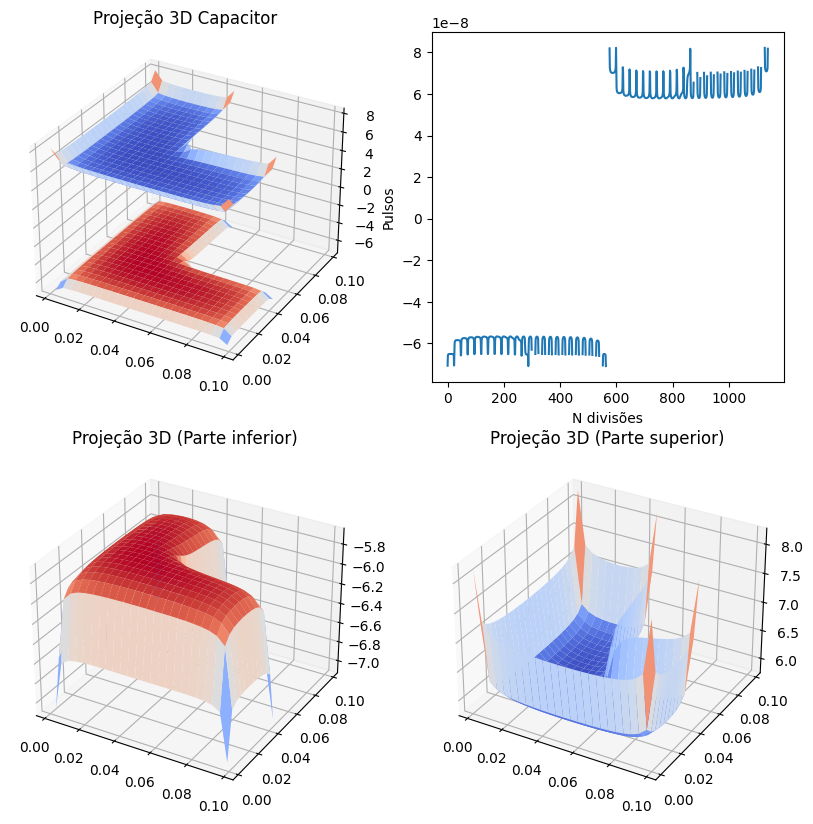

In [8]:
L = 0.1
d = 0.002
V0 = 10
N = 24

paralell_plate_capacitor(L, d, V0, N)

### 3. Resolva o problema e plote a distribuição superficial de carga para diferentes valores de N. Comente os resultados.

N = 8

Aproximação da distribuição de carga superficial = 1.045514847279999e-07


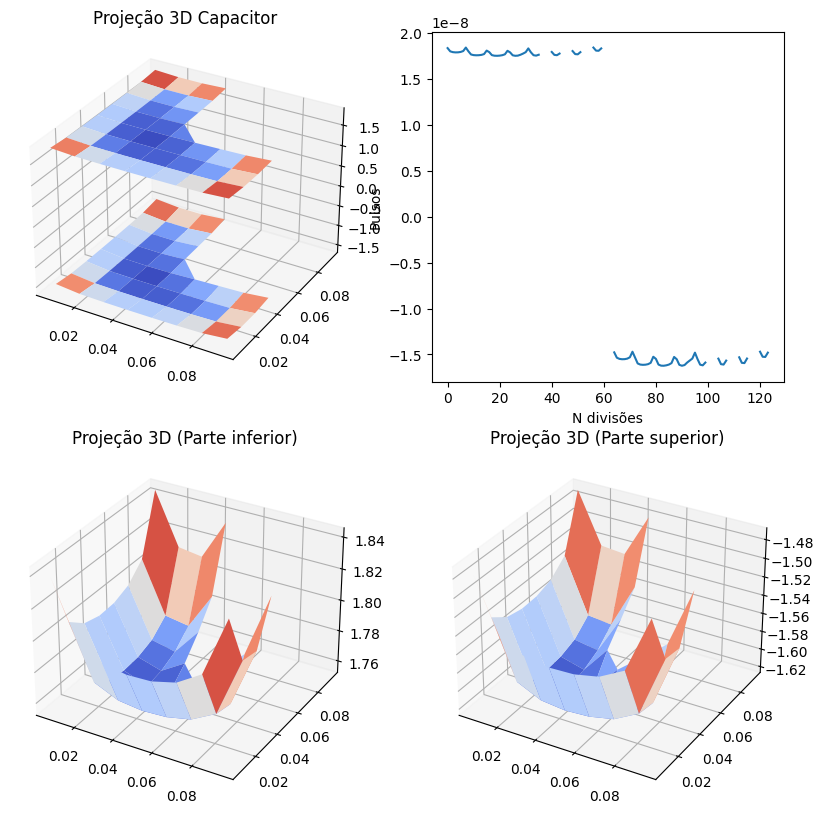

In [9]:
N = 8
paralell_plate_capacitor(L, d, V0, N)

N = 16

Aproximação da distribuição de carga superficial = 4.66263734301051e-07


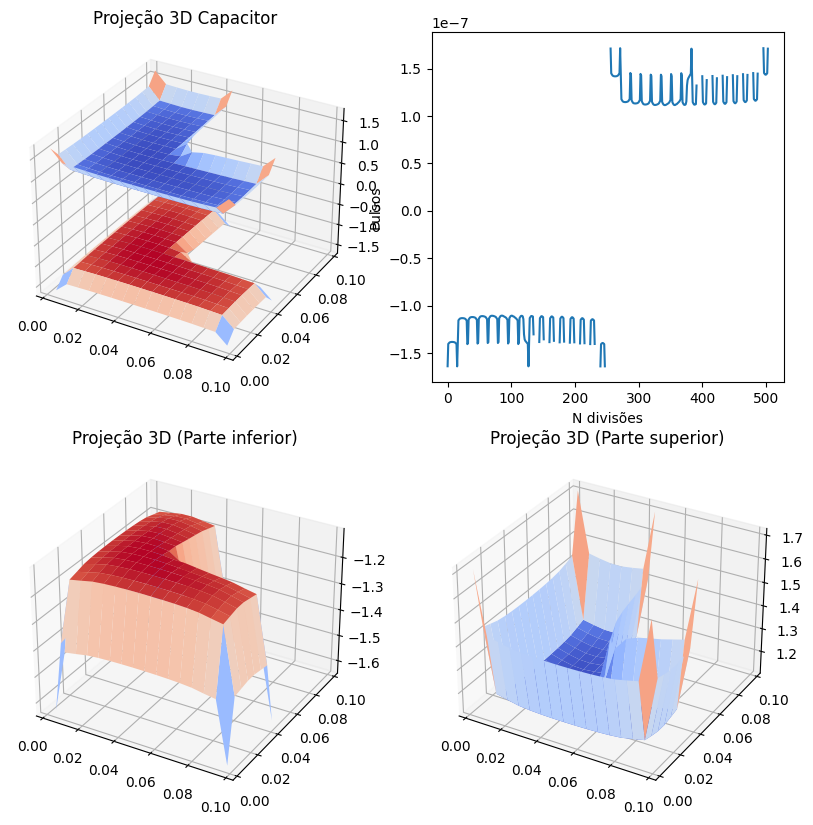

In [10]:
N = 16
paralell_plate_capacitor(L, d, V0, N)

N = 32

Aproximação da distribuição de carga superficial = 1.920143253043057e-06


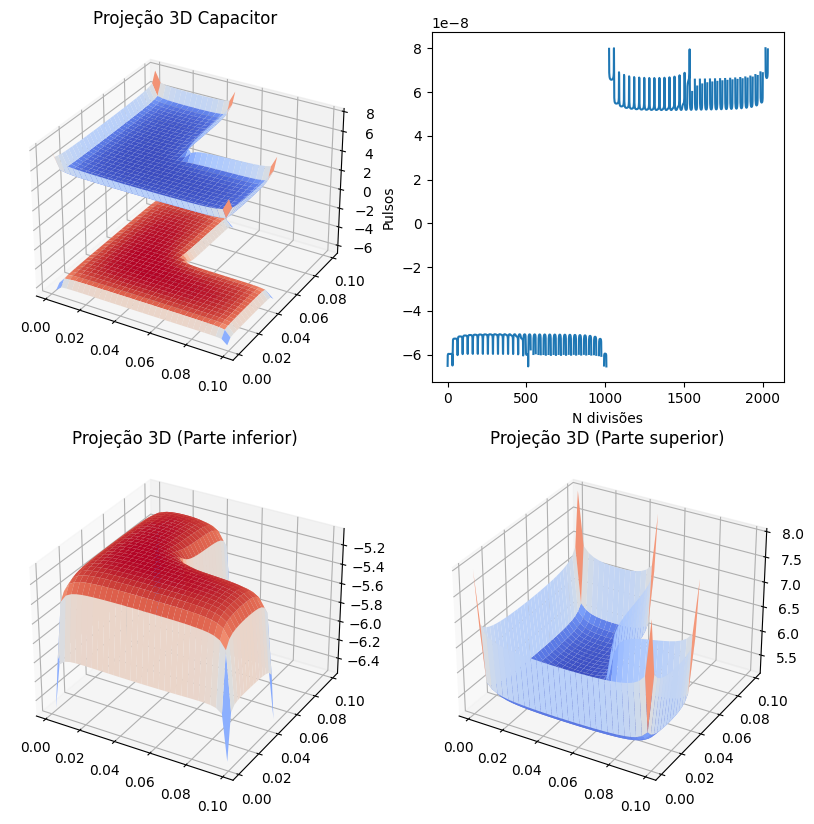

In [11]:
N = 32
paralell_plate_capacitor(L, d, V0, N)

N = 48

Aproximação da distribuição de carga superficial = 4.345537884928102e-06


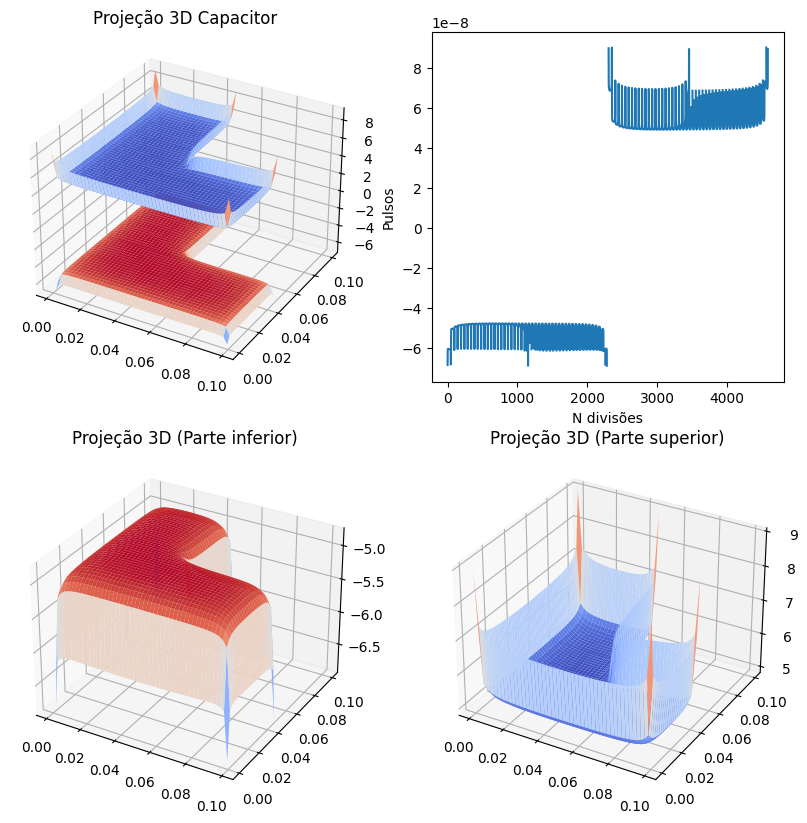

In [12]:
N = 48
paralell_plate_capacitor(L, d, V0, N)

N = 64

Aproximação da distribuição de carga superficial = 7.743895926685664e-06


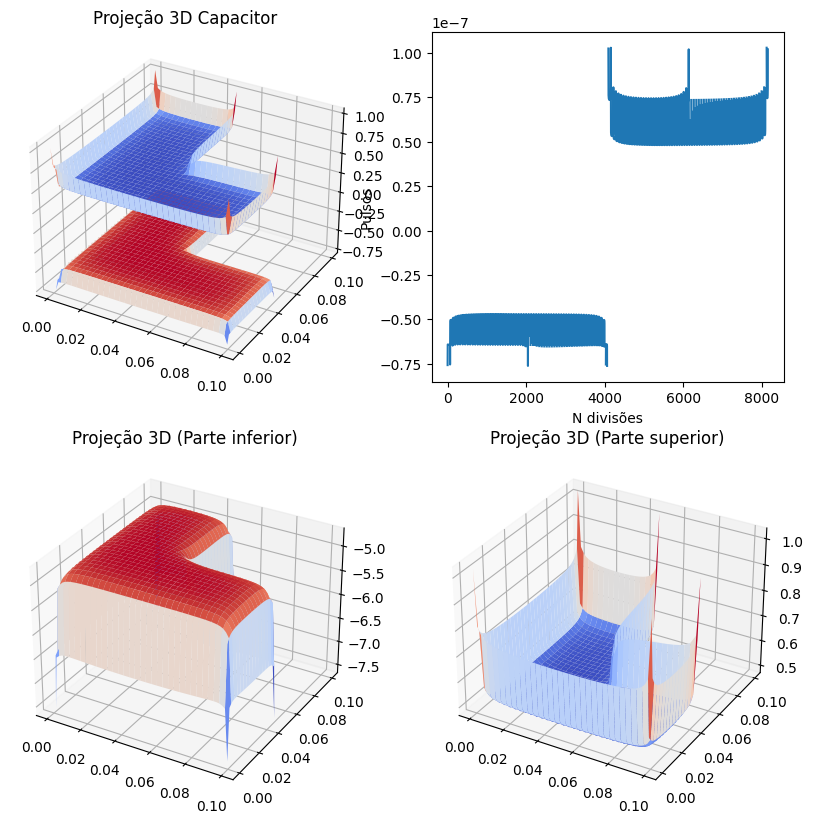

In [13]:
N = 64
paralell_plate_capacitor(L, d, V0, N)

N = 82

Aproximação da distribuição de carga superficial = 1.2730656655532345e-05


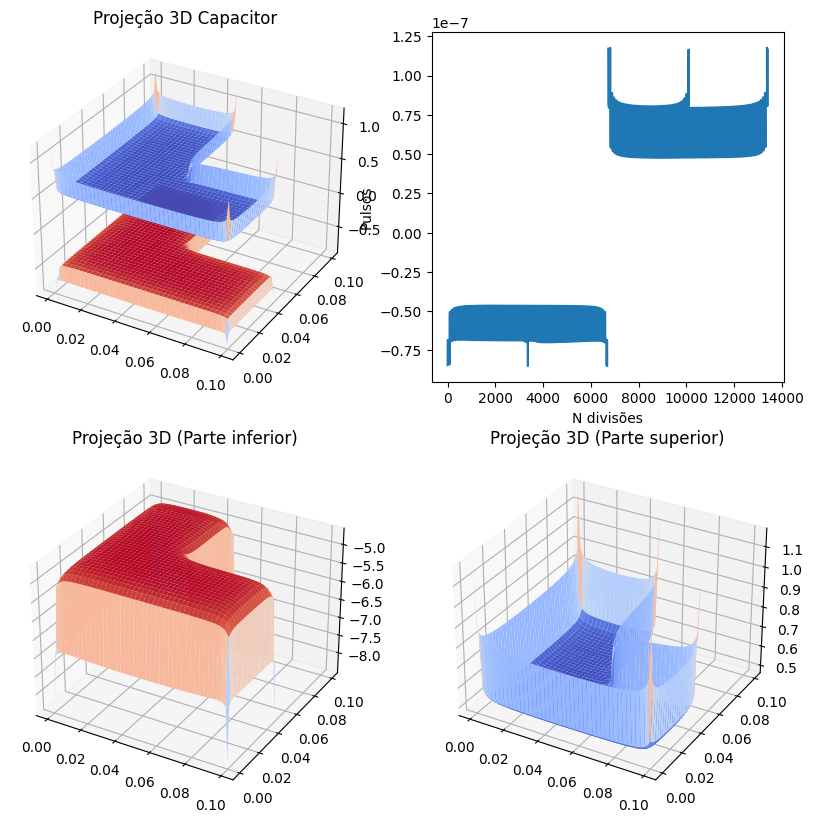

In [14]:
N = 82
paralell_plate_capacitor(L, d, V0, N)

Ao analisar as plotagens geradas ao se dividir a placa em mais segmentos, pode-se observar que a distribuição da carga tende a se concentrar nas bordas, concentrando-se principalmente nas pontas das placas paralelas e em torno de seu bordo, como demonstrado pelos gráficos. Esse fenômeno é conhecido como o poder das pontas e se torna cada vez mais evidente à medida que o número de quadrados discretizados cresce e a aproximação reflete cada vez mais a realidade.

### 4. Determine a expressão da Capacitância para a aproximação da carga através funções pulso e método dos momentos. Varie N, observe a convergência da capacitância e compare com o valor analítico aproximado (aproximação planar usual).

A capacitância pode ser obtida por:
$$ C = \frac{Q}{V} $$
onde $ V $ é $ V_0 $ e a carga total pode ser obtida através do somatório 
$$ Q = \sum_{n=N^2}^{2N^2}ρ_nΔ^2 $$
Por outro lado, podemos obter o valor analítico fazendo $ C = e_0 * \frac{A}{d} $,onde $ A = L^2 - \frac{L^2}{4} $ em nosso cenário do capacitor em $ L $. 

In [15]:
def plot_cap_results(cap, acap):
    dif = np.subtract(cap, acap)
    

    plt.plot(cap, label='Valor obtido')
    plt.axhline(y=acap, xmin = 0.044, xmax = 0.956, color='r', linestyle='-', label='Valor analítico')
    plt.plot(dif, label='Diferença')
    plt.grid(True)
    plt.legend()

    plt.show()

In [16]:
def get_capacitances(L, d, V0):
    """Calculates the capacitances of the capacitor"""
    e0 = 8.85e-12
    anCap = e0*L**2/d
    
    C = []
    N = 5
    while N <= 65:
        delta = L/N
        r, V, iP = set_initial_values(N, V0, delta)
        Z = impedance_matrix(N, r, delta, iP)
        A = get_pulses(Z, V)
        C.append( sum(A[N**2: 2*N**2])*delta**2/V0 )
        N += 5
        
    plot_cap_results(C, anCap) 

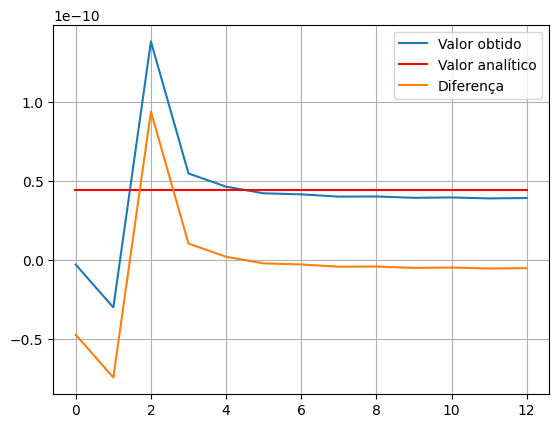

In [17]:
L = 0.1
d = 0.002
V0 = 10

get_capacitances(L, d, V0)

Ao analisar os resultados obtidos com o aumento de N, é possível perceber que a diferença entre o valor obtido e o valor analítico tende a zero, demonstrando que ambos convergem para um mesmo valor. Com isso, pode-se concluir que a aproximação utilizada para calcular a capacitância das placas paralelas é bastante precisa.